In [115]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Project Description

**Business Use Case**
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

**_Project Description_**
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

__About The Dataset__
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 


# importing dataset

In [116]:
df=pd.read_csv(r"E:\fliprobo technologies\projects\project_3_termdeposit\project3__termdeposit_train.csv")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [117]:
# find number of rows and columns
print("total Rows-",df.shape[0])
print("total columnss-",df.shape[1])

total Rows- 31647
total columnss- 18


In [118]:
# Dropping ID column
df.drop(["ID",'default'],axis=1,inplace=True)
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# Encoding categorical columns

In [119]:
# here i am using Ordinal Encoder for encoding categorical column
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df        

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,31,11.0,1.0,1.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,27,7.0,1.0,1.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,57,4.0,0.0,2.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,31,9.0,1.0,1.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,53,4.0,0.0,2.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
31644,32,4.0,2.0,2.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0
31645,57,9.0,1.0,1.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


In [120]:
df.describe()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


# correlation between target variable and independent variables.

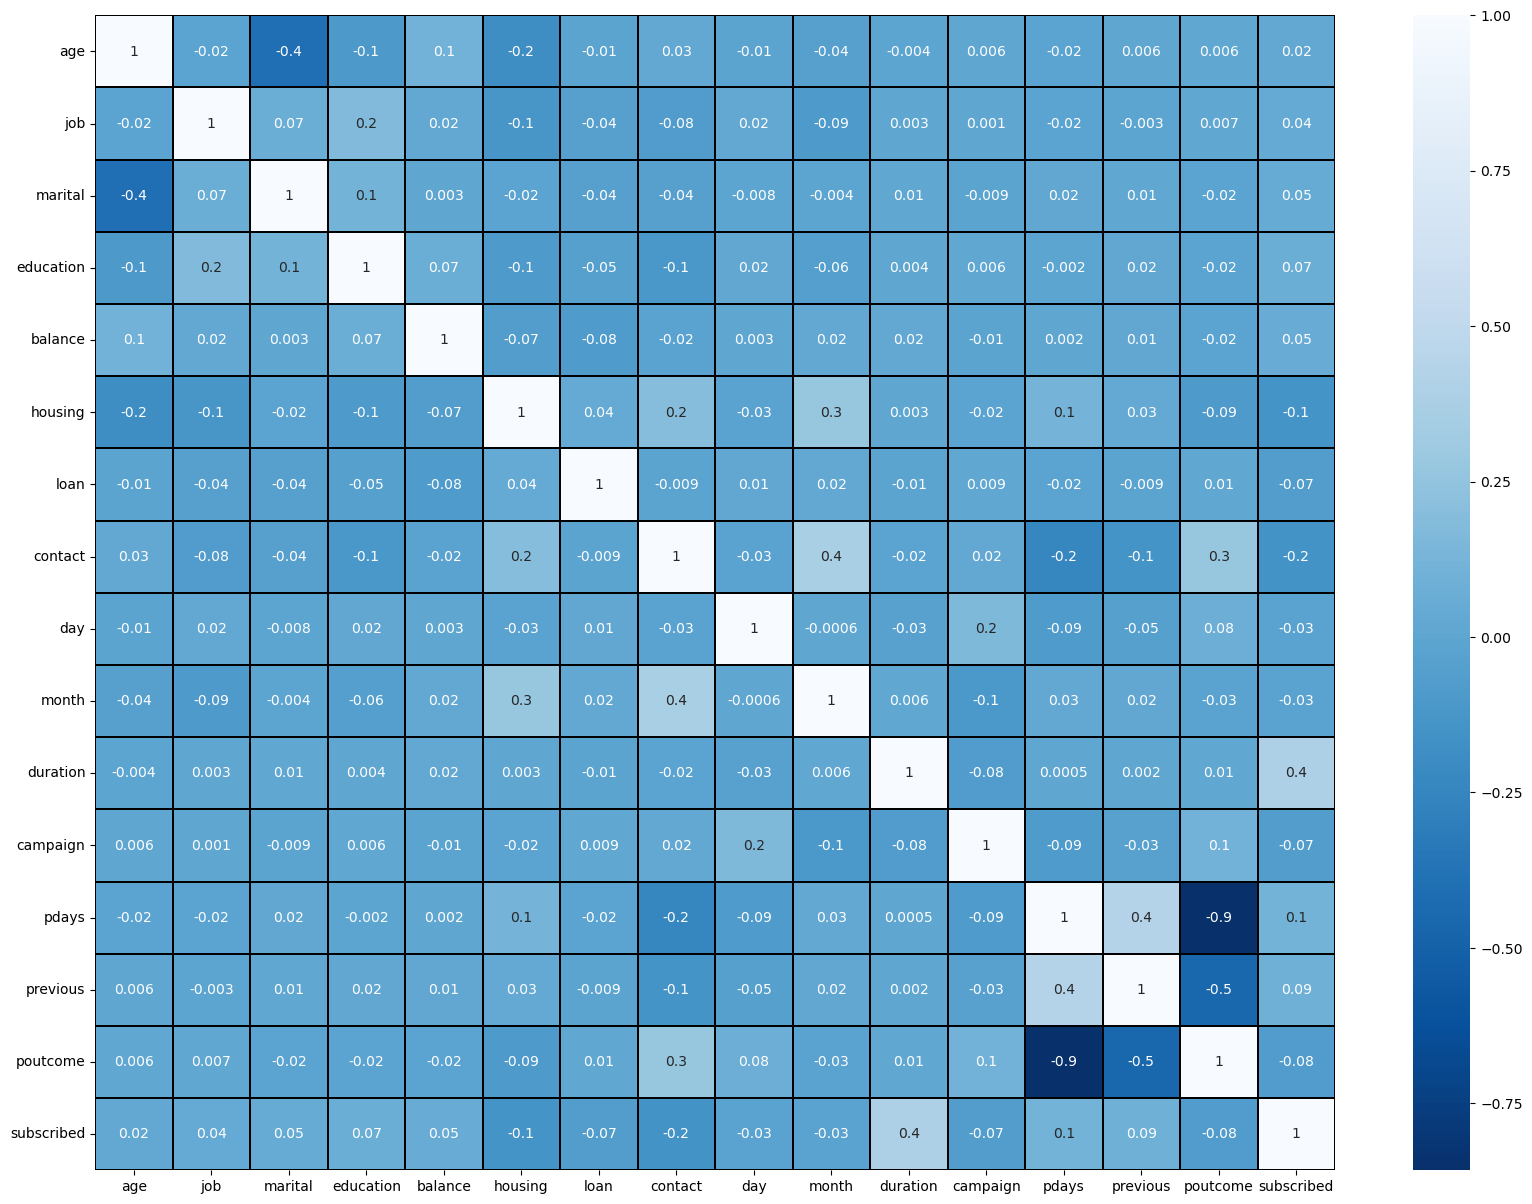

In [121]:
# visualizing the correlation by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor='black',annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

features are not correlated with each other

# visualizing the correlation between label and features using bar plot

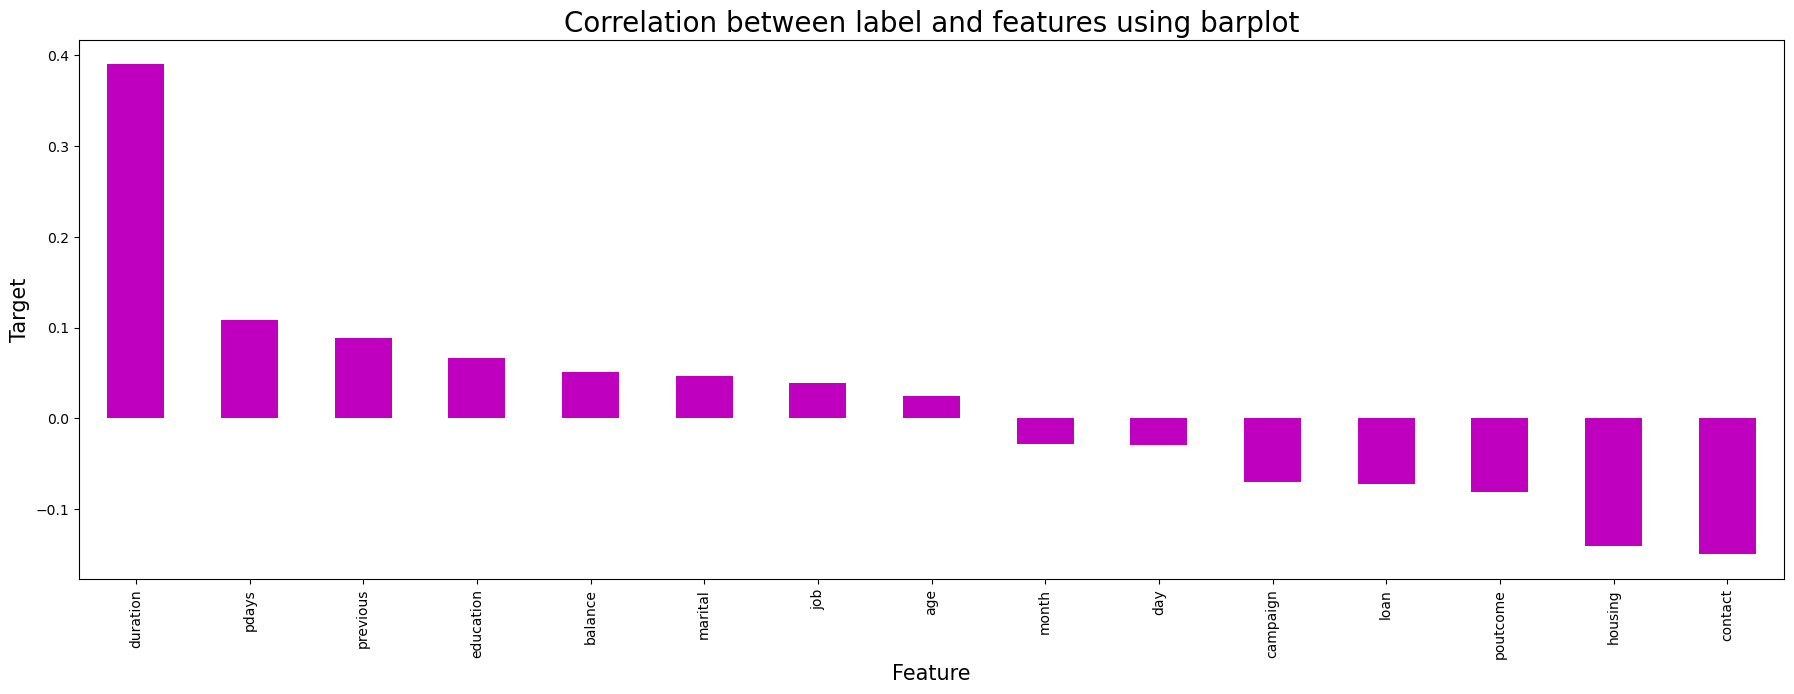

In [122]:
plt.figure(figsize=(22,7))
df.corr()['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

only contact and duration has correlation with the label

# visualizing outliers

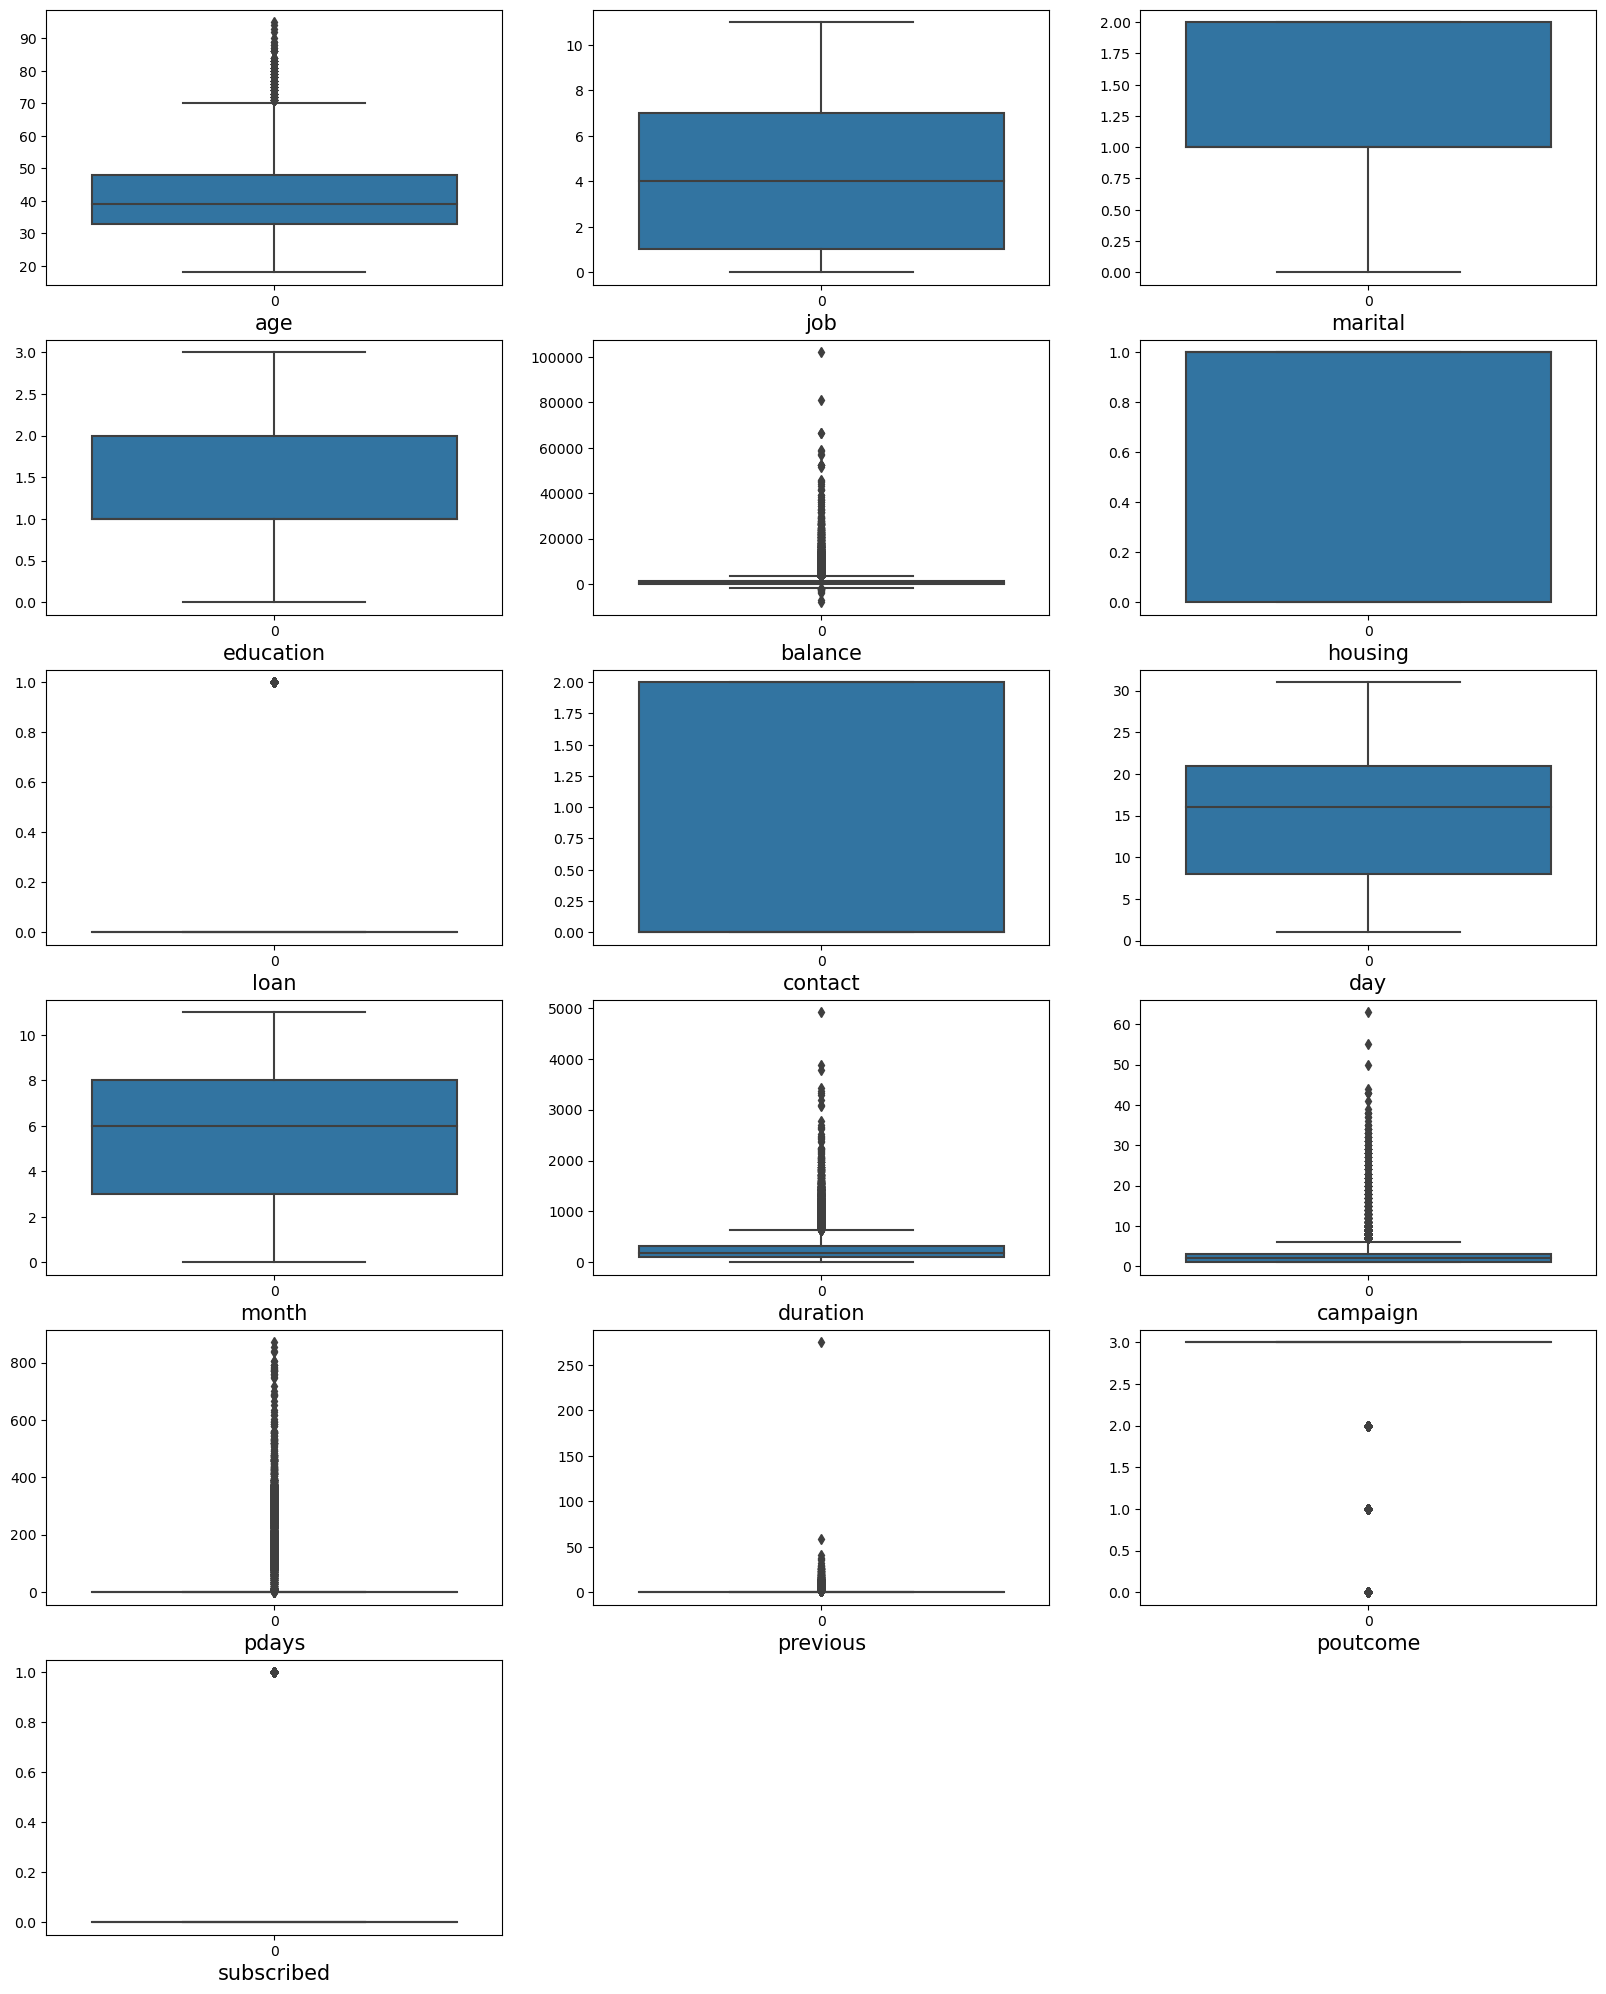

In [127]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=25:
        ac=plt.subplot(6,3,plotnumber)
        sns.boxplot(data=df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()  

# removing outliers

In [128]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(31647, 16)

In [129]:
print(np.where(z>3))

(array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64), array([11,  4, 12, ..., 12, 13, 10], dtype=int64))


In [130]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(31647, 16)
(28124, 16)


# data loss

In [131]:
loss=(df.shape[0]-df1.shape[0])/df.shape[0]*100
print(loss)

11.132176825607482


11% dass loss

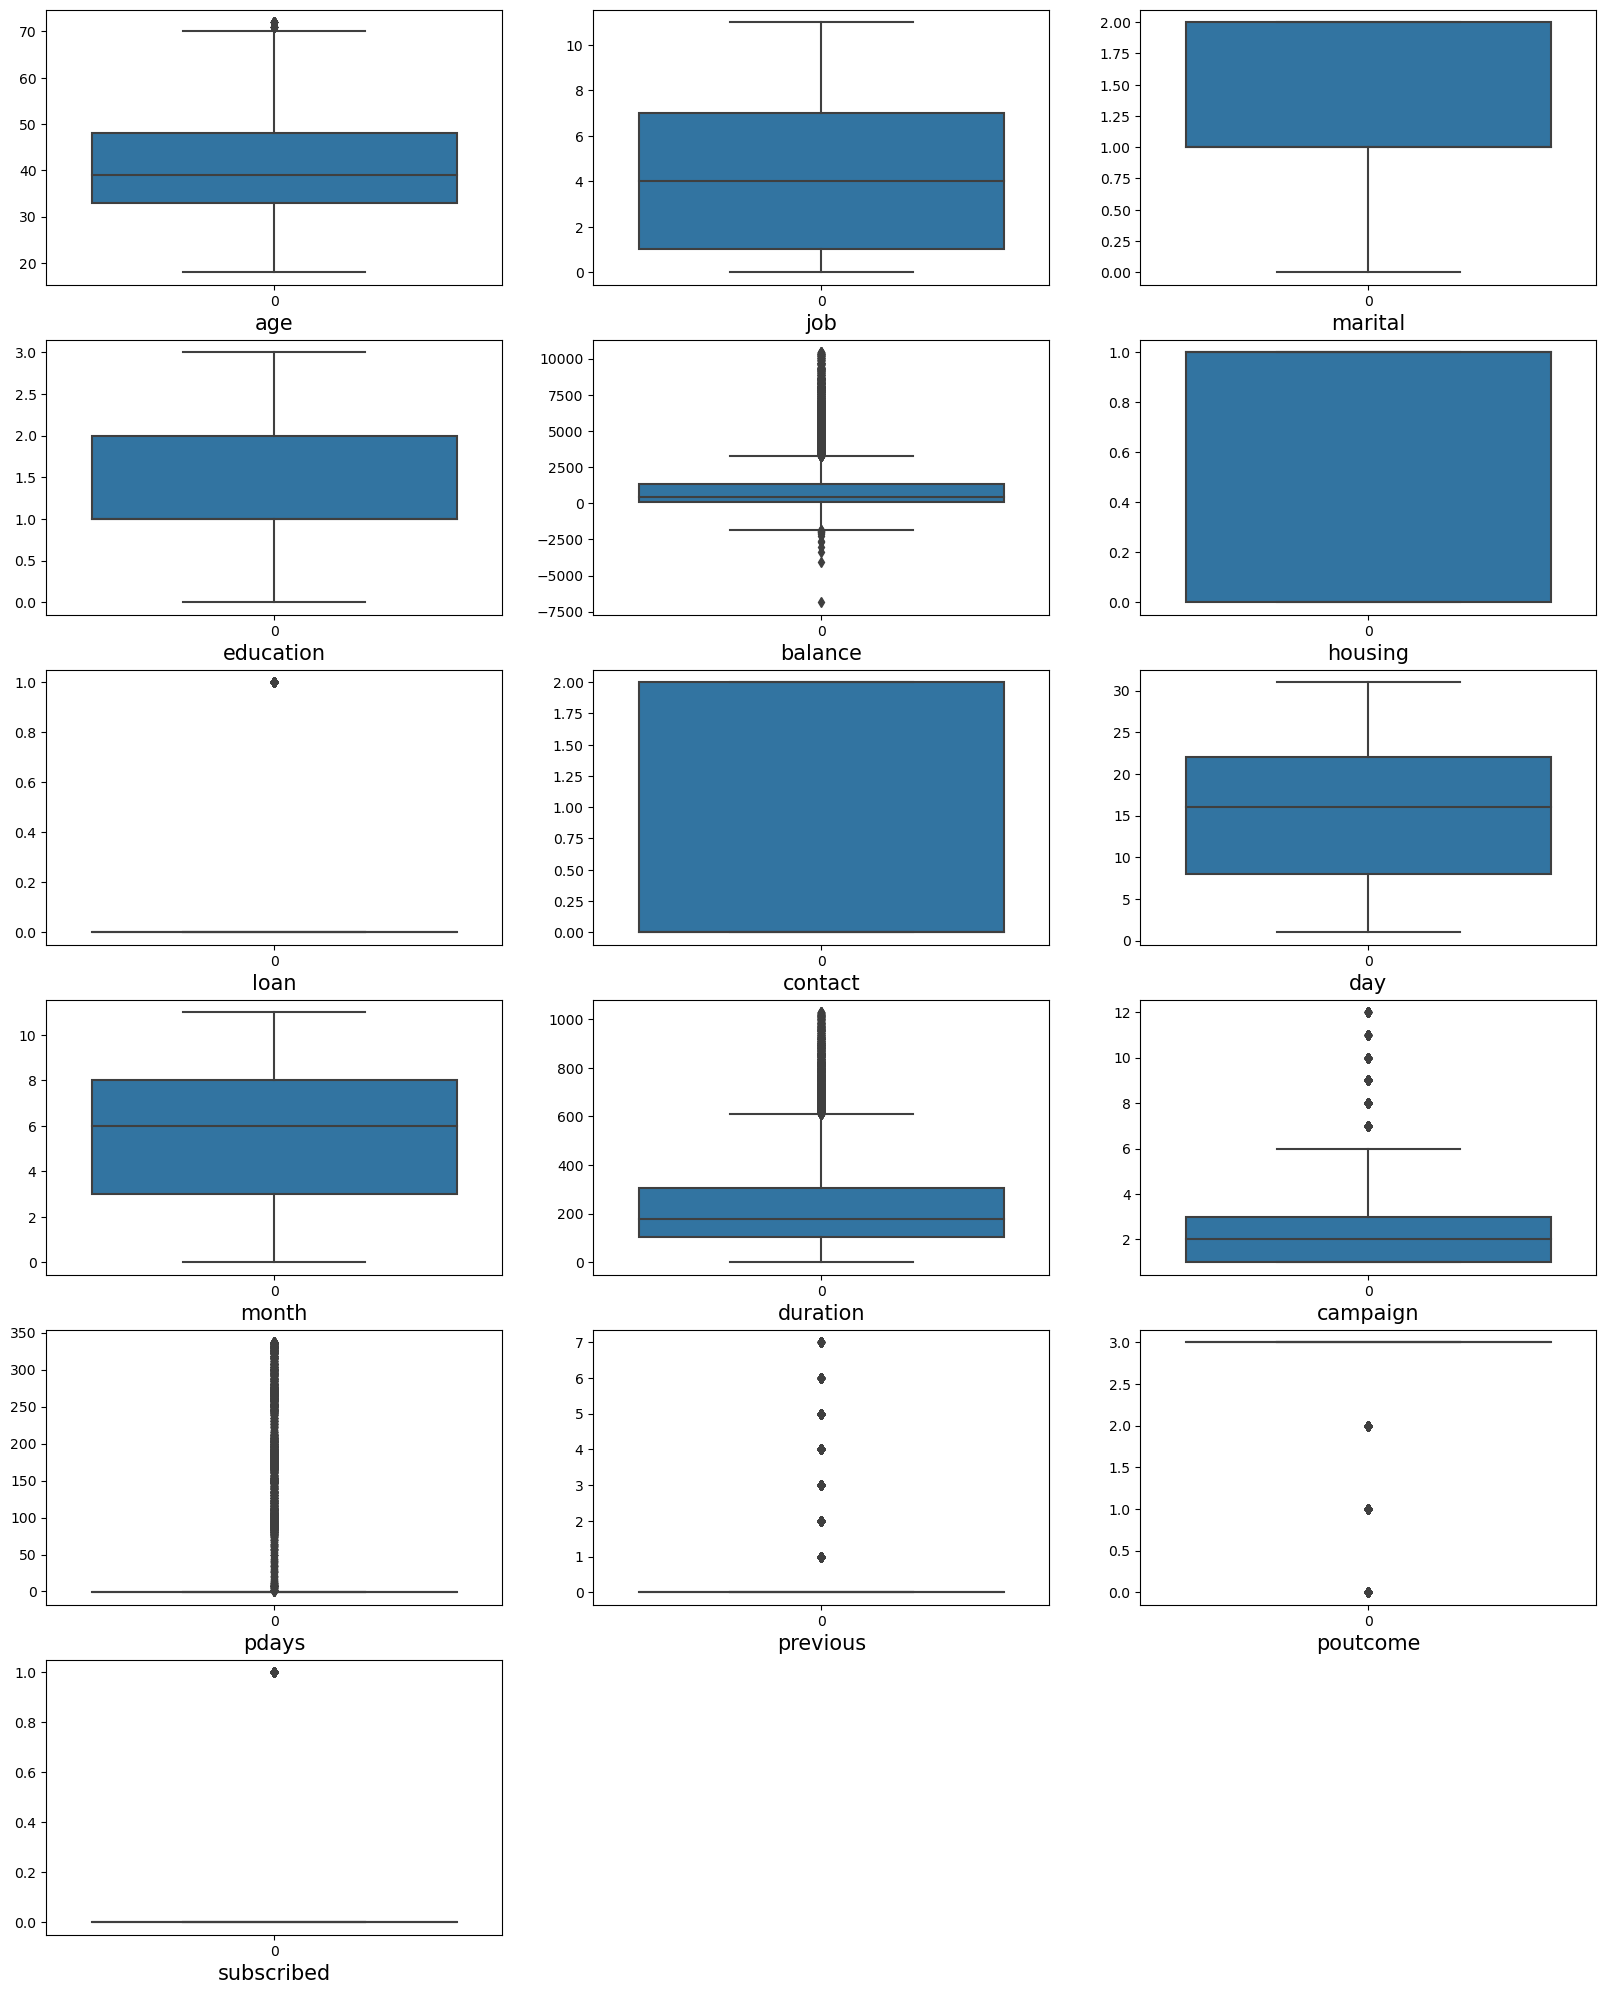

In [133]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=25:
        ac=plt.subplot(6,3,plotnumber)
        sns.boxplot(data=df1[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()

# checking distribution

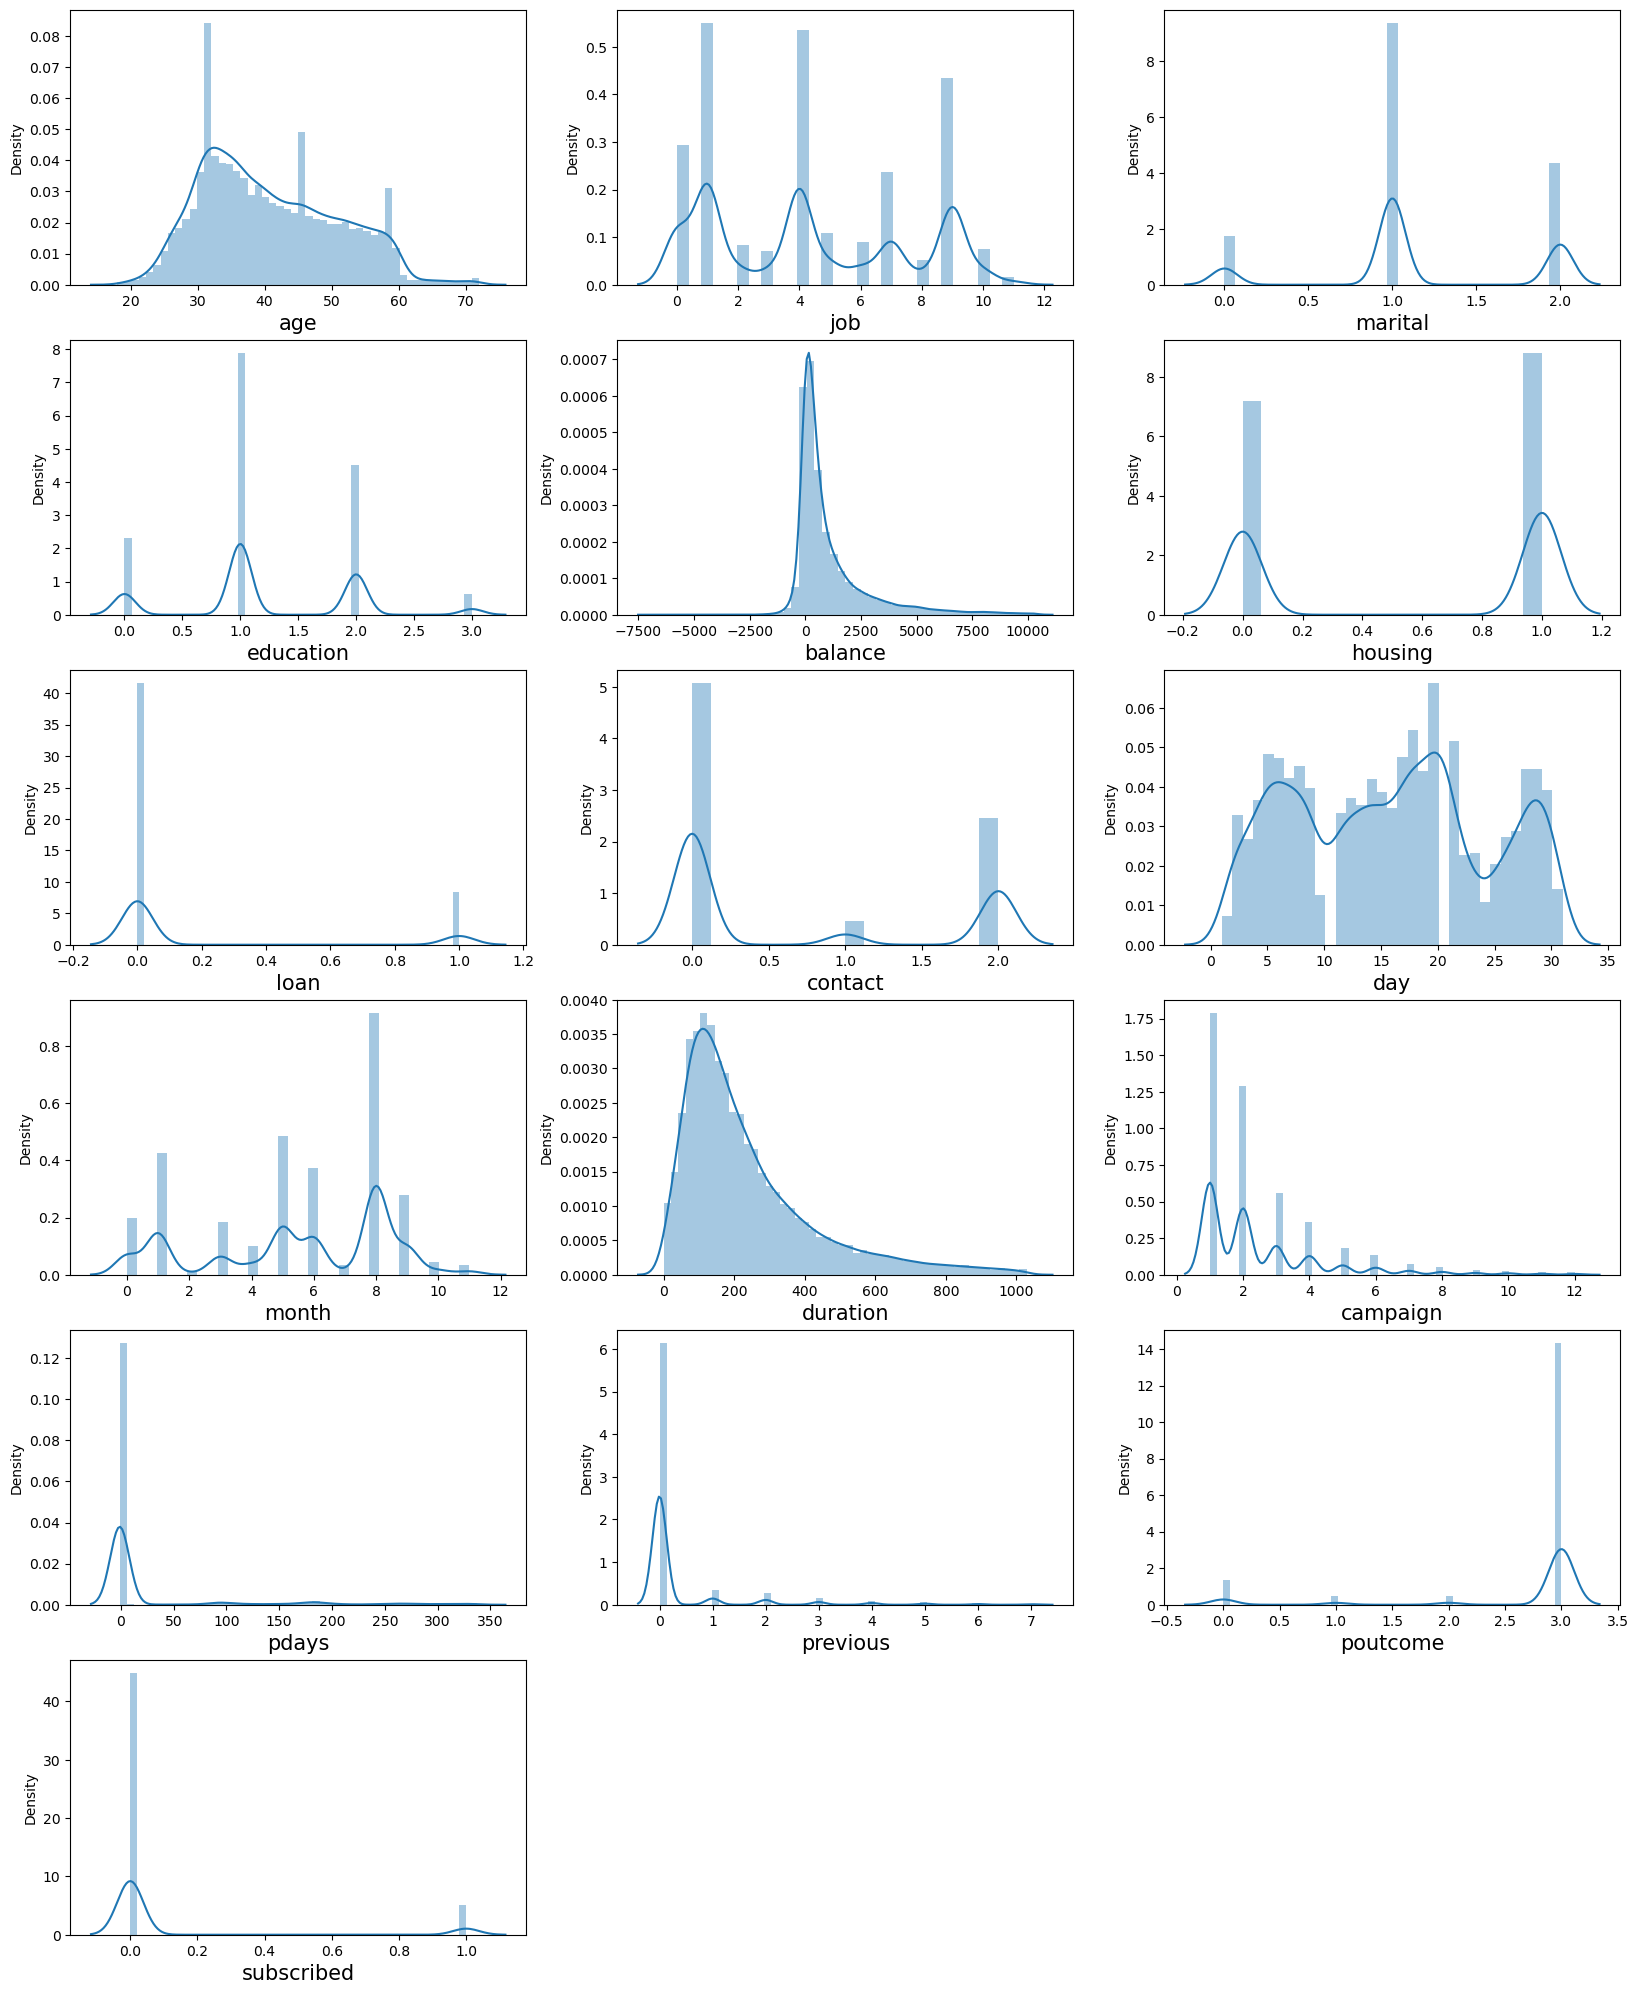

In [135]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=25:
        ac=plt.subplot(6,3,plotnumber)
        sns.distplot(df1[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()

In [136]:
df1.skew()

age           0.438496
job           0.260890
marital      -0.097176
education     0.199721
balance       2.437605
housing      -0.203589
loan          1.787691
contact       0.694487
day           0.073752
month        -0.471673
duration      1.596552
campaign      2.059359
pdays         2.824483
previous      3.691573
poutcome     -2.473077
subscribed    2.635813
dtype: float64

# Removing skewness

In [137]:
import numpy as np

for i in df1.columns:
    if i not in ["subscribed"]:
        if df1[i].skew()<0.5 and df1[i].skew()> -0.5:
            continue
        elif df1[i].skew() > 0.5 or df1[i].skew() < -0.5:
            df1[i] = np.cbrt(df1[i])

In [138]:
df1.skew()

age           0.438496
job           0.260890
marital      -0.097176
education     0.199721
balance      -0.435065
housing      -0.203589
loan          1.787691
contact       0.587529
day           0.073752
month        -0.471673
duration      0.310493
campaign      0.997328
pdays         2.186152
previous      2.299676
poutcome     -2.892821
subscribed    2.635813
dtype: float64

In [139]:
import numpy as np

for i in df1.columns:
    if i not in ["subscribed"]:
        if df1[i].skew()<0.5 and df1[i].skew()> -0.5:
            continue
        elif df1[i].skew() > 0.5 or df1[i].skew() < -0.5:
            df1[i] = np.cbrt(df1[i])

In [140]:
df1.skew()

age           0.438496
job           0.260890
marital      -0.097176
education     0.199721
balance      -0.435065
housing      -0.203589
loan          1.787691
contact       0.564329
day           0.073752
month        -0.471673
duration      0.310493
campaign      0.720020
pdays         2.089820
previous      2.103894
poutcome     -3.043839
subscribed    2.635813
dtype: float64

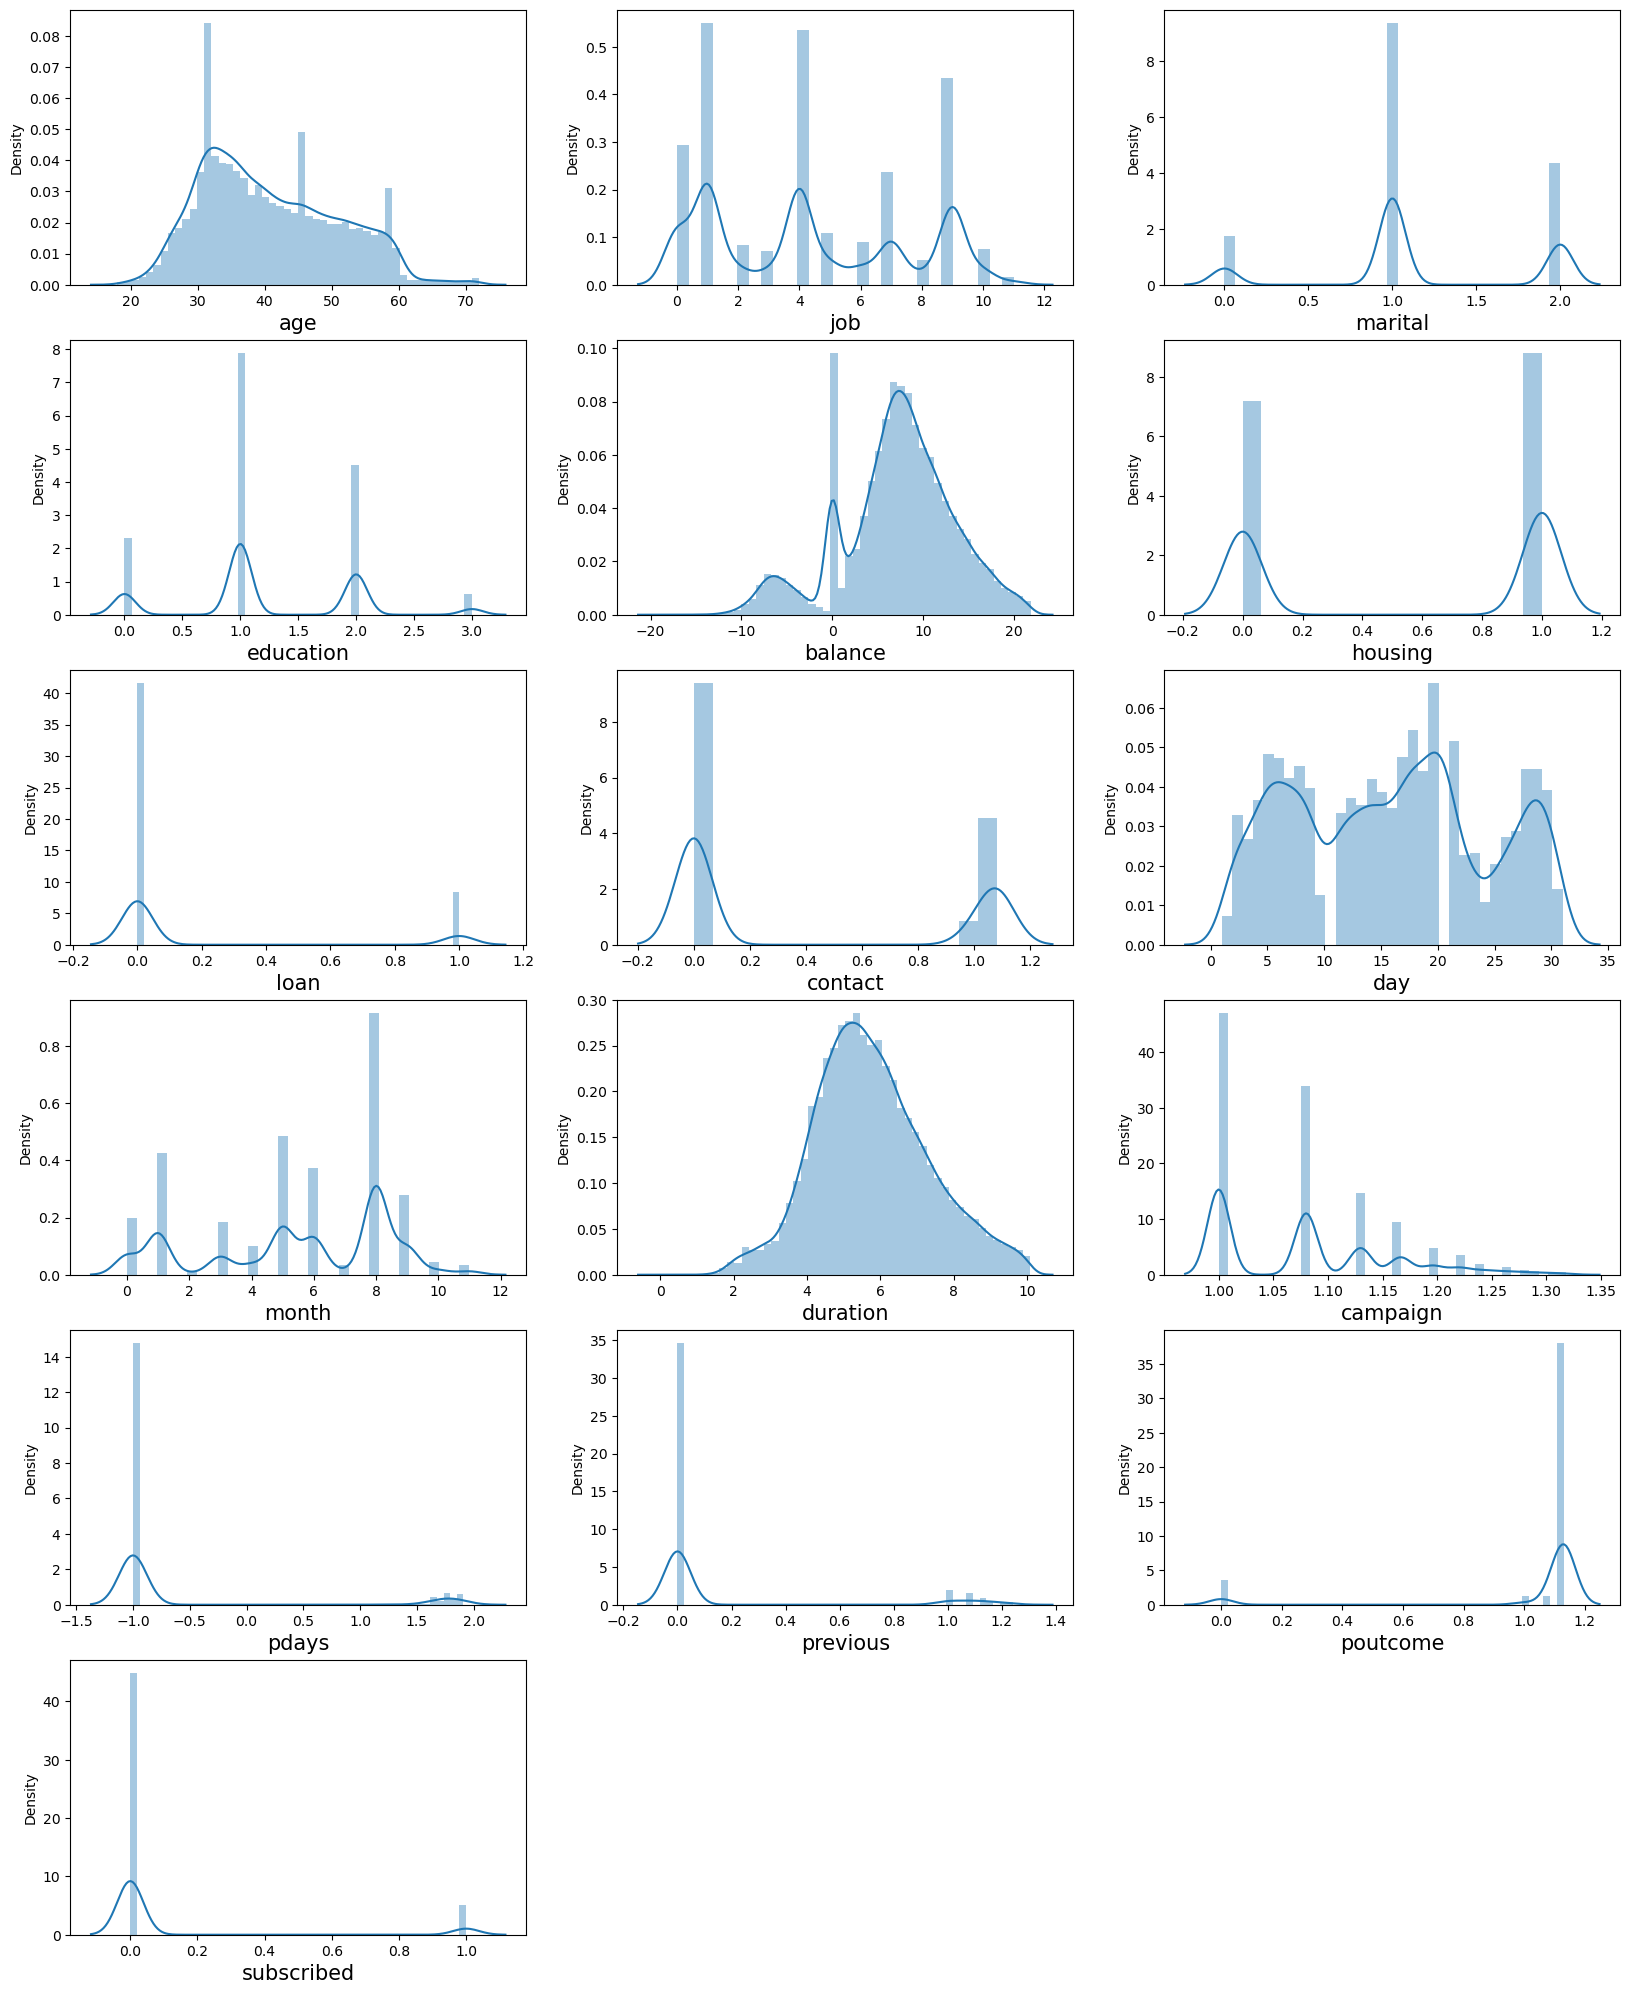

In [141]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=25:
        ac=plt.subplot(6,3,plotnumber)
        sns.distplot(df1[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()

# seperating features and label

In [142]:
x=df1.drop("subscribed",axis=1)
y=df1["subscribed"]

# Feature Scaling using Standard Scalarization

In [143]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.522811,-1.321707,-0.276906,2.376931,0.857969,-1.106956,-0.447423,1.187396,0.374734,1.175534,-1.435964,0.004302,-0.402339,-0.401733,0.314421
1,-0.957368,2.023504,-0.276906,-0.301360,-0.920001,-1.106956,-0.447423,-0.757748,0.493893,-0.164394,-0.816377,0.004302,-0.402339,-0.401733,0.314421
2,-1.354197,0.807064,-0.276906,-0.301360,0.400458,0.903378,-0.447423,-0.757748,0.255575,-0.164394,0.282780,-1.001702,-0.402339,-0.401733,0.314421
3,1.622018,-0.105266,-1.927894,1.037785,1.247239,-1.106956,-0.447423,-0.757748,0.732212,0.170588,2.409314,-1.001702,2.355182,2.594007,0.152566
4,-0.957368,1.415284,-0.276906,-0.301360,-0.358840,0.903378,-0.447423,-0.757748,-1.412653,-0.834358,0.941491,-1.001702,-0.402339,-0.401733,0.314421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,0.233118,-0.105266,1.374081,-0.301360,1.166942,-1.106956,-0.447423,1.343124,0.493893,0.170588,-1.706902,1.090847,-0.402339,-0.401733,0.314421
28120,-0.362125,1.415284,1.374081,1.037785,0.612958,-1.106956,-0.447423,1.343124,-1.174334,0.170588,1.181141,0.004302,-0.402339,-0.401733,0.314421
28121,-1.155782,-0.105266,1.374081,1.037785,-1.152806,0.903378,-0.447423,-0.757748,-0.459380,0.840552,-0.573652,0.004302,-0.402339,-0.401733,0.314421
28122,1.225189,-0.105266,-1.927894,1.037785,0.016372,-1.106956,2.235019,-0.757748,-1.293493,0.170588,1.166382,0.004302,-0.402339,-0.401733,0.314421


# finding the best random state

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0         # maximum accuracy
maxRS=0           # maximum random state
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)  
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Best accuracy is",maxAccu,"at random_state",maxRS)  

 Best accuracy is 0.9191751599905191 at random_state 54


# creating train test split

In [145]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

# classification Algorithms

In [146]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [147]:

# checking accuracy for RandomForestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9183455795212135
[[7473  138]
 [ 551  276]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      7611
         1.0       0.67      0.33      0.44       827

    accuracy                           0.92      8438
   macro avg       0.80      0.66      0.70      8438
weighted avg       0.91      0.92      0.91      8438



the accuracy of the model is 92%

# Logistic Regression

In [148]:
# checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.9093387058544679
[[7456  155]
 [ 610  217]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7611
         1.0       0.58      0.26      0.36       827

    accuracy                           0.91      8438
   macro avg       0.75      0.62      0.66      8438
weighted avg       0.89      0.91      0.89      8438



the accuracy of the model is 91%

# Support Vector Machine Classifier

In [149]:
# checking accuracy for Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9109978667930789
[[7553   58]
 [ 693  134]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      7611
         1.0       0.70      0.16      0.26       827

    accuracy                           0.91      8438
   macro avg       0.81      0.58      0.61      8438
weighted avg       0.89      0.91      0.89      8438



the accuracy of the model is 91%

# GradientBoostingClassifier

In [150]:

# checking accuracy for GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9155013036264518
[[7466  145]
 [ 568  259]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      7611
         1.0       0.64      0.31      0.42       827

    accuracy                           0.92      8438
   macro avg       0.79      0.65      0.69      8438
weighted avg       0.90      0.92      0.90      8438



the accuracy of the model is 92%

# AdaBoost Classifier

In [151]:
# checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.91265702773169
[[7428  183]
 [ 554  273]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      7611
         1.0       0.60      0.33      0.43       827

    accuracy                           0.91      8438
   macro avg       0.76      0.65      0.69      8438
weighted avg       0.90      0.91      0.90      8438



the accuracy of the model is 91%


# BaggingClassifier

In [153]:
# checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9118274472623844
[[7386  225]
 [ 519  308]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      7611
         1.0       0.58      0.37      0.45       827

    accuracy                           0.91      8438
   macro avg       0.76      0.67      0.70      8438
weighted avg       0.90      0.91      0.90      8438



the accuracy of the model is 91%

# ExtraTreesClassifier

In [154]:

# checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9139606541834558
[[7497  114]
 [ 612  215]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      7611
         1.0       0.65      0.26      0.37       827

    accuracy                           0.91      8438
   macro avg       0.79      0.62      0.66      8438
weighted avg       0.90      0.91      0.90      8438



the accuracy of the model is 91%

# cross valdation score

In [163]:
# checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predRFC)-score.mean())

[0.91342222 0.91271111 0.9136     0.91324444 0.91127312]
0.9128501785996523
Difference between Accuracy score and cross validation score is- 0.0054954009215612


In [164]:
# checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predLR)-score.mean())

[0.90435556 0.90968889 0.90453333 0.9056     0.90771693]
0.9063789410463094
Difference between Accuracy score and cross validation score is- 0.002959764808158405


In [165]:
# checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predGB)-score.mean())

[0.91217778 0.91111111 0.91342222 0.91395556 0.9109175 ]
0.9123168326220957
Difference between Accuracy score and cross validation score is- 0.0031844710043560376


In [166]:
# checking cv score for Support vector machine Classifier
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predsvc)-score.mean())

[0.90524444 0.90631111 0.9072     0.90773333 0.90842817]
0.9069834107792003
Difference between Accuracy score and cross validation score is- 0.00401445601387862


In [167]:
# checking cv score for Adaboost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predABC)-score.mean())

[0.90648889 0.90826667 0.9056     0.90968889 0.90860597]
0.9077300837679786
Difference between Accuracy score and cross validation score is- 0.004926943963711405


In [168]:
# checking cv score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predBC)-score.mean())

[0.90542222 0.90595556 0.90862222 0.91057778 0.90967283]
0.908050121700648
Difference between Accuracy score and cross validation score is- 0.0037773255617363777


In [169]:
# checking cv score for Support ExtraTrees Classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score.mean())

[0.91022222 0.91217778 0.91093333 0.91075556 0.91038407]
0.9108945914335388
Difference between Accuracy score and cross validation score is- 0.0030660627499170534


Support vector machine Classifier is our best model as the difference between accuracy score and cross validation score is least. i.e(0.03)


# saving the model

In [171]:
import joblib
joblib.dump(LR,"bank_marketing.pkl")

['bank_marketing.pkl']

# predicting by using the saved model

In [172]:
# lets load the saved model and get the prediction
model=joblib.load("bank_marketing.pkl")

In [173]:
# predictions
prediction=model.predict(x_test)
prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [174]:
# creating a dataframe
conclusion=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,8428,8429,8430,8431,8432,8433,8434,8435,8436,8437
Predicted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Original,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
x1_test=pd.read_csv(r"E:\fliprobo technologies\projects\project_3_termdeposit\project_3_termdeposit_test.csv")
x1_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [177]:
# here i am using Ordinal Encoder for encoding categorical column
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in x1_test.columns:
    if x1_test[i].dtypes=="object":
        x1_test[i]=OE.fit_transform(x1_test[i].values.reshape(-1,1))
x1_test   

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
1,40403,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
2,3709,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
3,37422,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
4,12527,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0
13560,11743,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0
13561,28292,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0
13562,45163,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3,2.0


In [179]:
# Dropping ID column
x1_test.drop(["ID",'default'],axis=1,inplace=True)
x1_test

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7.0,1.0,1.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
1,78,5.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
2,31,6.0,2.0,2.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
3,57,7.0,2.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
4,45,1.0,0.0,1.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4.0,1.0,2.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0
13560,54,1.0,1.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0
13561,35,5.0,1.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0
13562,29,0.0,2.0,1.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3,2.0


In [180]:
# predictions
prediction=model.predict(x1_test)
prediction

array([1., 1., 1., ..., 1., 1., 1.])